In [423]:
# import libraries 

from bs4 import BeautifulSoup
import requests
import time
import datetime

import smtplib

In [424]:
URL="https://www.amazon.in/ADRO-Cotton-Hooded-Sweatshirt-H22-1-BLR-CH-S_Beige_S/dp/B0B944J8CV/ref=rvi_sccl_1/260-7700766-9804052?pd_rd_w=YVPuK&content-id=amzn1.sym.59eebe5b-59e3-4882-b364-90a7b22774a2&pf_rd_p=59eebe5b-59e3-4882-b364-90a7b22774a2&pf_rd_r=6X9V8GWZZTPVSAEJ7F0Z&pd_rd_wg=dO0R3&pd_rd_r=948d7829-2904-4ae7-9516-d11fecdfd5fb&pd_rd_i=B0B941W7TM&th=1&psc=1"
headers={"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"}
 
page = requests.get(URL,headers=headers)    

soup1 = BeautifulSoup(page.content,"html.parser")

In [425]:
soup2 = BeautifulSoup(soup1.prettify(),"html.parser")

In [427]:

title = soup2.find(id="productTitle").get_text()
pricey =soup2.find("span", class_= "a-price-whole").get_text()
deliverydate = soup2.find(id="mir-layout-DELIVERY_BLOCK-slot-PRIMARY_DELIVERY_MESSAGE_LARGE").get_text()
Desc = soup2.find(id="productDescription").get_text()

In [428]:
cnt=0
for i in Desc:
    if i != "\n":
        cnt +=1
CNT = cnt-1
Description = Desc[16:CNT]
DateofDelivery = deliverydate.strip()[83:96]
Title=title.strip()
price=pricey.strip()
if pricey.strip()[3] == '\n':
    price = pricey.strip()[0:3]
else:
    price = pricey.strip()[0:4]

In [429]:
CNT = cnt-1

In [430]:

Description = Desc[16:CNT]
Description

"This winter Indian homegrown brand ADRO brings you the Best Quality 100% Cotton Hoodies to keep you warm. Made in India Product for the Indian market at the Best Prices. Pair it with Jeans/Joggers or Shorts and this sweatshirts/hoodie made of soft fabric will make other guys go green with envy. We at ADRO offers Top Quality casual wear in the widest variety which makes it easy to choose and at the prices that are easy to reach. ADRO products are made of Premium Fabrics which are Eco-Friendly to ensure the Best Quality and Great Comfort. ADRO deals in Men's Sweatshirts, Men's Printed T-Shirts, Full Sleeve T-Shirts, Polo T-Shirts, Hoodies for men. We also in plan to add Men's Shirts, Jeans and Chinos/Shorts to keep you updated with trends. ADRO - Keep Inventing\n     "

In [441]:
deliverydate.replace('\n','')

'                                  FREE delivery                                                                   Thursday, 3 November                                                                  . Order within                                                                   11 hrs 31 mins                                                                  .                                                                   Details                                 '

In [432]:
DateofDelivery = deliverydate.strip()[83:96]

In [433]:
DateofDelivery 

'Monday, 7 Nov'

In [406]:
title

'\n                   ADRO Mens Bangalore Printed Hoodies\n                  '

In [250]:
Title=title.strip()

In [252]:
Title

'ADRO Mens Bangalore Printed Hoodies'

In [88]:
pricey

'\n                   969\n                   \n                    .\n                   \n'

In [84]:
price=pricey.strip()


In [85]:
price.strip()

'969\n                   \n                    .'

In [120]:
if pricey.strip()[3] == '\n':
    price = pricey.strip()[0:3]
else:
    price = pricey.strip()[0:4]

In [121]:

price

'969'

In [215]:
deliverydate

''

In [336]:
#one method to import to CSV
import pandas as pd
val ={'Title':Title,'Price':price,'Delivery':DateofDelivery,'Description':Description}
val
DataofHoodies=pd.DataFrame(val,index=[1])
DataofHoodies.to_csv(r'Newwy.csv',index=False)

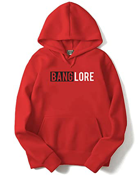

In [278]:
i

In [279]:
df

,Title,Price,Delivery
1,ADRO Mens Bangalore Printed Hoodies,969,"Monday, 7 Nov"


In [465]:
#Another Method to import to CSV

import csv

header=["Title","Price","Delivery Date","Description Date"]
data=[Title,price,DateofDelivery,Description]

with open("Amazon_Data2.csv",'w',newline='',encoding='UTF8') as w:
    write = csv.writer(w)
    write.writerow(header)
    write.writerow(data)

In [ ]:
#To get the Image of the Product
import urllib.request

In [ ]:
urllib.request.urlretrieve("https://m.media-amazon.com/images/I/51rJhyR7RzL._SX342._SX._UX._SY._UY_.jpg", "in.jpg")

In [151]:
from PIL import Image
dimensions = (140, 220)
i = Image.open('in.jpg')
i.thumbnail(dimensions)

In [466]:
def hood_date(url):
    #URL="https://www.amazon.in/ADRO-Cotton-Hooded-Sweatshirt-H22-1-BLR-CH-S_Beige_S/dp/B0B944J8CV/ref=rvi_sccl_1/260-7700766-9804052?pd_rd_w=YVPuK&content-id=amzn1.sym.59eebe5b-59e3-4882-b364-90a7b22774a2&pf_rd_p=59eebe5b-59e3-4882-b364-90a7b22774a2&pf_rd_r=6X9V8GWZZTPVSAEJ7F0Z&pd_rd_wg=dO0R3&pd_rd_r=948d7829-2904-4ae7-9516-d11fecdfd5fb&pd_rd_i=B0B941W7TM&th=1&psc=1"
    URL=url
    headers={"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"}
 
    page = requests.get(URL,headers=headers)    

    soup1 = BeautifulSoup(page.content,"html.parser")
    
    soup2 = BeautifulSoup(soup1.prettify(),"html.parser")
    title = soup2.find(id="productTitle").get_text()
    pricey =soup2.find("span", class_= "a-price-whole").get_text()
    deliverydate = soup2.find(id="mir-layout-DELIVERY_BLOCK-slot-PRIMARY_DELIVERY_MESSAGE_LARGE").get_text()
    Desc = soup2.find(id="productDescription").get_text()
    cnt=0
    for i in Desc:
        if i != "\n":
            cnt +=1
    CNT = cnt-1
    Description = Desc[16:CNT]
    DateofDelivery = deliverydate.strip()[83:104]
    print(DateofDelivery)
    Title=title.strip()
    price=pricey.strip()
    if pricey.strip()[3] == '\n':
        price = pricey.strip()[0:3]
    else:
        price = pricey.strip()[0:4]
    print(price)
    
    header=["Title","Price","Delivery Date","Description"]
    data=[Title,price,DateofDelivery,Description]

    with open("Amazon_Data2.csv",'a+',newline='',encoding='UTF8') as w:
        write = csv.writer(w)
        write.writerow(data)
    
    
    
    

In [467]:
hood_date("https://www.amazon.in/ADRO-Cotton-Hooded-Sweatshirt-H22-1-BLR-CH-S_Beige_S/dp/B0B944J8CV/ref=rvi_sccl_1/260-7700766-9804052?pd_rd_w=YVPuK&content-id=amzn1.sym.59eebe5b-59e3-4882-b364-90a7b22774a2&pf_rd_p=59eebe5b-59e3-4882-b364-90a7b22774a2&pf_rd_r=6X9V8GWZZTPVSAEJ7F0Z&pd_rd_wg=dO0R3&pd_rd_r=948d7829-2904-4ae7-9516-d11fecdfd5fb&pd_rd_i=B0B941W7TM&th=1&psc=1")

Monday, 7 November
  
969


In [468]:
df = pd.read_csv("Amazon_Data2.csv")

In [469]:
df

,Title,Price,Delivery Date,Description Date
0,ADRO Mens Bangalore Printed Hoodies,969,"Monday, 7 Nov",This winter Indian homegrown brand ADRO brings...
1,ADRO Mens Bangalore Printed Hoodies,969,"Monday, 7 November\n",This winter Indian homegrown brand ADRO brings...


In [343]:
CNT

791

In [471]:
hood_date("https://www.amazon.in/Be-savage-Cotton-Green-S_Dark-Green_S/dp/B0B7JRSY4F/ref=d_pd_sbs_sccl_2_3/260-7700766-9804052?pd_rd_w=h7Dsz&content-id=amzn1.sym.02182ec1-65c5-4957-978b-1e230c9c10a7&pf_rd_p=02182ec1-65c5-4957-978b-1e230c9c10a7&pf_rd_r=Q17WPRPEVAP2R5BFCZMS&pd_rd_wg=lqMN8&pd_rd_r=925f6400-8b03-42ce-b502-c594d7ebcb98&pd_rd_i=B09DVMJMCL&psc=1")

Friday, 4 November
  
679


In [473]:
dfdf = pd.read_csv("Amazon_Data2.csv")

In [474]:
dfdf

,Title,Price,Delivery Date,Description Date
0,ADRO Mens Bangalore Printed Hoodies,969,"Monday, 7 Nov",This winter Indian homegrown brand ADRO brings...
1,ADRO Mens Bangalore Printed Hoodies,969,"Monday, 7 November\n",This winter Indian homegrown brand ADRO brings...
2,Be savage Basic Men's Cotton Hoodie,679,"Friday, 4 November\n",Look cool wearing this hoodie from the house o...
